# **데이터 전처리**

* 예제데이터
    * 타이타닉
    * 뉴욕 공기오염도
    * 카시트 판매량

## **0. 환경준비**

### (1) Import

In [57]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### (2) Data Loading

* 타이타닉 데이터

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Survived 	|	 생존여부(범주 : 0,1)	|	Target	|
|	Pclass 	|	객실등급(범주 :1,2,3)	|	feature	|
|	Sex 	|	 성별(범주 : male, female)	|	feature|
|	Age 	|	 나이	|	feature	|
|	SibSp 	|	 배우자 혹은 형제자매 수	|	feature	|
|	Parch 	|	 부모 혹은 자녀 수	|	feature	|
|	Fare 	|	 운임(단위 : 달러)	|	feature	|
|	Cabin 	|	 객실번호	|	feature	|
|	Embarked 	|	 승선지(범주 : S(southampton), Q(queenstown), C(cherbourg)	|	feature	|


In [58]:
# titanic
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv'
titanic = pd.read_csv(path, usecols = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Cabin','Embarked'])
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


* 뉴욕 공기오염도 데이터

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Ozone 	|	 오존농도	|	Target	|
|	Solar.R 	|	태양복사열	|	feature	|
|	Temp 	|	 온도(화씨)	|	feature|
|	Wind	|	 바람세기	|	feature	|
|	Day 	|	 관측일	|	feature	|

In [59]:
# airquality
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv'
air = pd.read_csv(path)
air.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


* 카시트 판매량 데이터

|	변수명	|	설명	|	구분	|
|----|----|----|
|	Sales 	|	 각 지역 판매량(단위 : 1000개)	|	Target	|
|	CompPrice 	|	지역별 경쟁사 판매가격(달러)	|	feature	|
|	Advertising 	|	 각 지역, 회사의 광고 예산(단위 : 1000달러)	|	feature|
|	Income 	|	 지역 주민 평균소득(단위 : 1000달러)	|	feature	|
|	Population 	|	 지역 인구수(단위 : 1000명)	|	feature	|
|	Price 	|	 자사 지역별 판매가격(달러)	|	feature	|
|	ShelveLoc 	|	 진열상태(범주 : Bad, Medium, Good)	|	feature	|
|	Age 	|	 지역 인구의 평균 연령	|	feature	|
|	US 	|	 매장이 미국에 있는지 여부(범주 : Yes, No)	|	feature	|
|	Urban 	|	 매장이 도시에 있는지 여부(범주 : Yes, No)	|	feature	|
|	Education 	|	 평균학력수준(범주 : 11~17)	|	feature	|


In [60]:
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/Carseats_NA.csv'
carseat = pd.read_csv(path)
carseat.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111.0,48.0,16,260,83,Good,65,10,Yes,Yes
2,10.06,113.0,35.0,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117.0,100.0,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141.0,64.0,3,340,128,Bad,38,13,Yes,No


## **1. 데이터 전처리**

### (1) 데이터 분할

#### ① x, y 분할하기

In [61]:
target = 'Survived'
x = titanic.drop(target, axis = 1)
y = titanic.loc[:, target]

In [62]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [63]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### ② train : validation 분할하기
* 분할된 데이터셋 용도
    * train : 모델링(학습) 용
    * val : 모델 검증 용
* train_test_split : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
* 주요 옵션
    * test_size 혹은 train_size : 소수 - 비율로 분할, 자연수 - 건수로 분할
    * shuffle : True(기본값) 랜덤하게 섞어서 분할, False - 데이터셋 인덱스 순서대로 분할(주로, 시계열 데이터를 시간순으로 분할할 때 사용)
    * random_state : shuffle이 True일 때, 지정한 숫자가 같으면 동일한 규칙으로 섞음(우리는 규칙을 알 수 없음)

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .3)

In [66]:
x_train.shape, x_val.shape

((623, 8), (268, 8))

#### 📝복습문제

* 뉴욕 공기오염도 데이터를 분할하시오.
    * 뉴욕 공기오염도 데이터는 시계열 데이터입니다.
    * target : Ozone
    * val 건수 : 60건
    * 분할1 : x2, y2
    * 분할2 : x2_train, x2_val, y2_train, y2_val

In [67]:
target = 'Ozone'
x2 = air.drop(target, axis=1)
y2 = air.loc[:, target]

x2_train, x2_val, y2_train, y2_val = train_test_split(x2, y2, test_size=60)

* 카시트 판매량 데이터를 분할하시오.
    * target : Sales
    * train : val = 8 : 2
    * 분할1 : x3, y3
    * 분할2 : x3_train, x3_val, y3_train, y3_val

In [90]:
target = 'Sales'
x3 = carseat.drop(target, axis=1)
y3 = carseat.loc[:, target]

x3_train, x3_val, y3_train, y3_val = train_test_split(x3, y3, test_size=.2)

### (2) NaN 조치

#### ① 결측치 확인

In [69]:
x.isna().sum()
# x.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

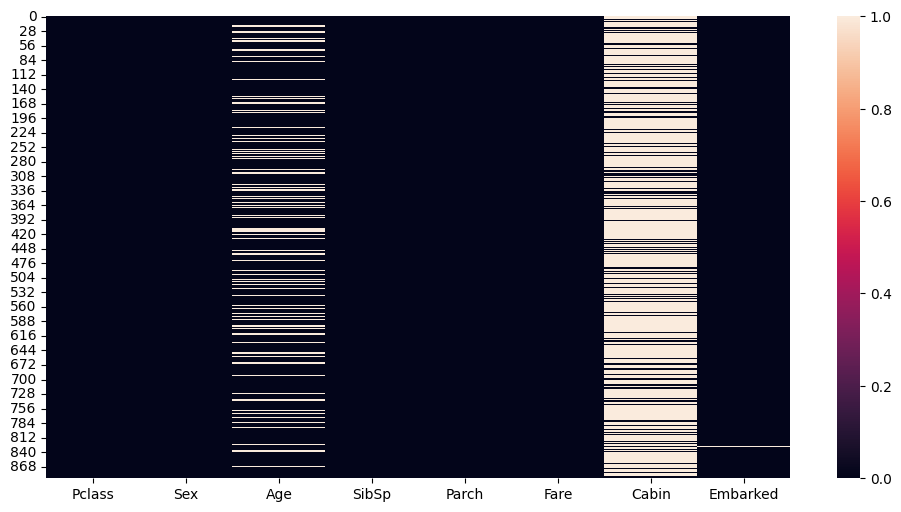

In [70]:
plt.figure(figsize = (12,6))
sns.heatmap(x.isna())
plt.show()

* 📝복습문제
    * 뉴욕공기오염도 데이터에 대해서 NaN을 찾아 봅시다.

In [71]:
air.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Date       0
dtype: int64

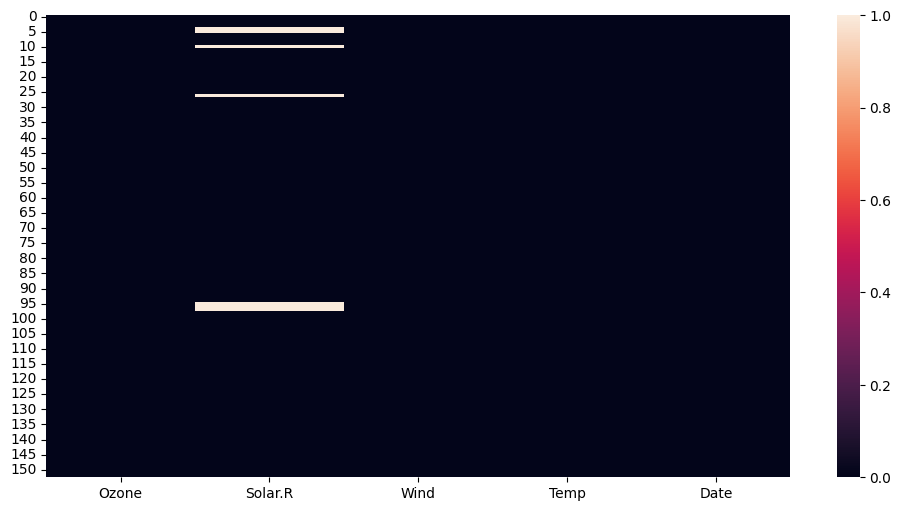

In [72]:
plt.figure(figsize = (12,6))
sns.heatmap(air.isna())
plt.show()

* 📝복습문제
    * 카시트 판매량 데이터에 대해서 NaN을 찾아 봅시다.

In [73]:
carseat.isna().sum()

Sales           0
CompPrice      17
Income         19
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

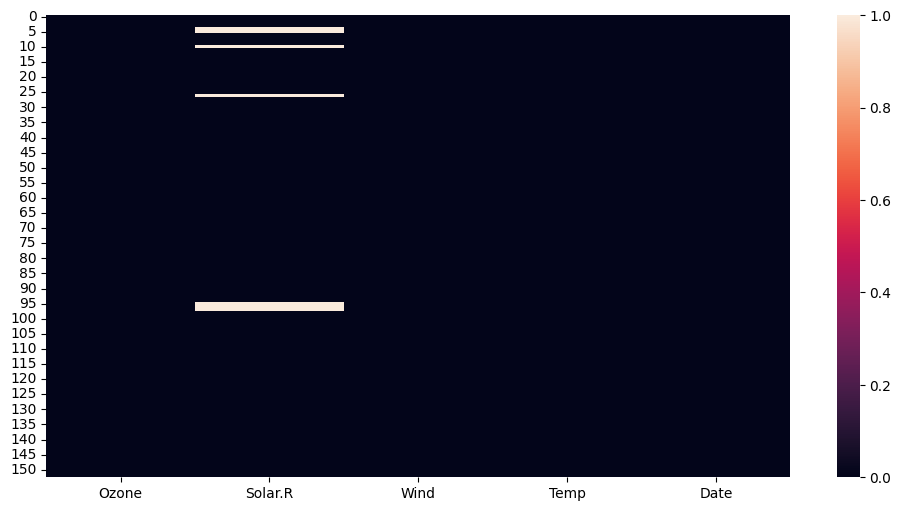

In [74]:
plt.figure(figsize = (12,6))
sns.heatmap(air.isna())
plt.show()

#### ② 결측치 제거

In [75]:
# 데이터프레임 x_train을 temp로 복사
temp = x_train.copy()

In [76]:
temp.shape

(623, 8)

* 행 제거
    * 행을 제거할 때
        * NaN이 적고,
        * 운영에서 NaN이 발생하지 않거나, 무시할 수 있을 때.
    * dropna : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

* 전체에서 NaN이 하나라도 있는 모든행 제거

In [77]:
temp.dropna(axis = 0, inplace = True)
temp.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [78]:
temp.shape

(129, 8)

* 특정 열의 NaN이 포함된 행 제거
    * subset = [칼럼이름] (반드시 리스트로 입력되어야 합니다.)

In [79]:
temp = x_train.copy()
temp.shape

(623, 8)

In [80]:
temp.isna().sum()

Pclass        0
Sex           0
Age         119
SibSp         0
Parch         0
Fare          0
Cabin       480
Embarked      1
dtype: int64

In [81]:
# Age에서 NaN이 있는 행 제거
temp.dropna(axis = 0, subset = ['Age'], inplace = True)
temp.shape

(504, 8)

In [82]:
# 다시 복사해서, 이번엔, Age와 Embarked 중에서 NaN이 있는 행을 제거합시다.
temp = x_train.copy()
temp.dropna(axis = 0, subset = ['Age', 'Embarked'], inplace = True)
temp.shape

(503, 8)

In [83]:
temp.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       374
Embarked      0
dtype: int64

* 열 제거
    * 열을 제거할 때
        * NaN이 많거나, 변수(열)가 중요하지 않을 때
    * 제거 방법
        * dropna : NaN이 있는 열 모두 제거
        * drop : 특정 행 제거

In [84]:
temp = x_train.copy()
temp.isna().sum()

Pclass        0
Sex           0
Age         119
SibSp         0
Parch         0
Fare          0
Cabin       480
Embarked      1
dtype: int64

* dropna로 NaN이 포함된 모든 열 삭제

In [85]:
temp.dropna(axis = 1, inplace = True)
temp.isna().sum()

Pclass    0
Sex       0
SibSp     0
Parch     0
Fare      0
dtype: int64

* drop으로 특정 열을 삭제합시다.

In [86]:
temp = x_train.copy()
temp.drop('Cabin', axis = 1, inplace = True)
temp.isna().sum()

Pclass        0
Sex           0
Age         119
SibSp         0
Parch         0
Fare          0
Embarked      1
dtype: int64

* 📝복습문제
    * 뉴욕공기오염도 데이터 x2_train을 temp2로 복사해 놓고
    * NaN이 있는 전체 행을 제거합시다.

In [87]:
temp2 = x2_train.copy()

In [88]:
temp2.dropna(axis =0, inplace=True)
temp2.isna().sum()

Solar.R    0
Wind       0
Temp       0
Date       0
dtype: int64

* 📝복습문제
    * 카시트 데이터를 x3_train을 temp2로 복사해 놓고
        * Income 변수의 NaN 행을 제거합시다.
        * CompPrice 열을 제거.

In [92]:
# Income 변수의 NaN 행을 제거합시다.
temp2 = x3_train.copy()
temp2.dropna(axis=0, subset=['Income'], inplace=True)

In [94]:
# CompPrice 열을 제거.
temp2.drop(axis=1, columns=['CompPrice'])

,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
140,60.0,10,277,129,Medium,45,18,Yes,Yes
36,76.0,0,270,100,Good,60,18,No,No
342,102.0,13,422,118,Medium,71,10,No,Yes
343,42.0,10,371,121,Bad,26,14,Yes,Yes
18,110.0,0,408,68,Good,46,17,No,Yes
...,...,...,...,...,...,...,...,...,...
229,104.0,0,404,72,Medium,27,18,No,No
201,83.0,0,139,134,Medium,54,18,Yes,No
346,107.0,0,144,125,Medium,33,13,No,No
210,41.0,2,357,123,Bad,47,14,No,Yes


#### ③ 결측치 채우기

* fillna와 SimpleImputer를 배웁니다. 기능이 겹치는 부분이 있습니다.
* 추천하는 용도는 다음과 같습니다.
    * 시계열 데이터 : .fillna, .interpolate
    * 비시계열 데이터 : SimpleImputer

#####.fillna
* 단일값, 0으로 채우기 : .fillna(0)
* 이전 값으로 채우기 : .fillna(method = 'ffill')
* 이후 값으로 채우기 .fillna(method = 'bfill')
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

In [95]:
temp = air.copy()
temp.head()

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05


* 단일값으로 채우기

In [96]:
# 단일값으로 채우는 것처럼 조회
temp.fillna(0).head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [97]:
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,NaN,14.3,56,1973-05-05
5,28,NaN,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


In [98]:
# 단일값으로 진짜 채우기 : inplace = True
temp.fillna(0, inplace = True)
temp.head(7)

,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,0.0,14.3,56,1973-05-05
5,28,0.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


* 이전값, 이후값으로 채우기(시계열 데이터에만 가능!)

In [99]:
temp = air.copy()

In [100]:
# 이전 값으로 채우기
temp.fillna(method = 'ffill').head(7)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9140\2566494860.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temp.fillna(method = 'ffill').head(7)


,Ozone,Solar.R,Wind,Temp,Date
0,41,190.0,7.4,67,1973-05-01
1,36,118.0,8.0,72,1973-05-02
2,12,149.0,12.6,74,1973-05-03
3,18,313.0,11.5,62,1973-05-04
4,19,313.0,14.3,56,1973-05-05
5,28,313.0,14.9,66,1973-05-06
6,23,299.0,8.6,65,1973-05-07


##### .interpolate(method = 'linear')
* 전,후 값의 사이값으로 채우기(시계열 데이터에만 가능!)
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

In [101]:
temp.interpolate(method = 'linear').head(7)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_9140\1895253540.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  temp.interpolate(method = 'linear').head(7)


,Ozone,Solar.R,Wind,Temp,Date
0,41,190.000000,7.4,67,1973-05-01
1,36,118.000000,8.0,72,1973-05-02
2,12,149.000000,12.6,74,1973-05-03
3,18,313.000000,11.5,62,1973-05-04
4,19,308.333333,14.3,56,1973-05-05
5,28,303.666667,14.9,66,1973-05-06
6,23,299.000000,8.6,65,1973-05-07


* 📝복습문제
    * titanic 데이터 x_train를 temp1로 복사해 놓고
        * Age에 대해서 평균값으로 채우시오.
        * Embarked에 대해서 최빈값으로 채우시오.
            * 최빈값 : series.mode()

In [104]:
temp1 = x_train.copy()
temp1.fillna(temp1['Age'].mean(), inplace=True)

In [105]:
temp1.fillna(temp1['Embarked'].mode(), inplace=True)

* 📝복습문제
    * 공기오염도 x2_train을 temp2에 복사해 놓고
    * 이후값(bfill)으로 채우시오.

In [107]:
temp2 = x2_train.copy()
# temp2.fillna(method='bfill') # deprecated
temp2.bfill()
temp2

,Solar.R,Wind,Temp,Date
11,256.0,9.7,69,1973-05-12
112,259.0,15.5,77,1973-08-21
42,250.0,9.2,92,1973-06-12
105,157.0,9.7,80,1973-08-14
138,237.0,6.9,78,1973-09-16
...,...,...,...,...
87,82.0,12.0,86,1973-07-27
140,27.0,10.3,76,1973-09-18
57,47.0,10.3,73,1973-06-27
70,175.0,7.4,89,1973-07-10


##### SimpleImputer
* https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html
* 특정값으로 채우기
    * 최빈값
    * 중앙값
    * 평균값
    * 상수

* Age에 대해 평균값으로 채워 봅시다.

In [108]:
from sklearn.impute import SimpleImputer

In [109]:
temp = x_train.copy()
temp.isna().sum()

Pclass        0
Sex           0
Age         119
SibSp         0
Parch         0
Fare          0
Cabin       480
Embarked      1
dtype: int64

In [110]:
# 선언
imputer1 = SimpleImputer(strategy = 'mean')

# 만들고 적용 : .fit_transform (.fit + .tranform)
# 반드시 입력은 2차원이어야 함.
temp[['Age']] = imputer1.fit_transform(temp[['Age']])

temp.isna().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       480
Embarked      1
dtype: int64

* Embarked는 최빈값(strategy = 'most_frequent')로 채워 봅시다.

In [111]:
# 선언
imputer2 = SimpleImputer(strategy = 'most_frequent')

# 만들고 적용하기
x[['Embarked']] = imputer2.fit_transform(x[['Embarked']])
x.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64

* 📝복습문제
    * 카시트 데이터 x3_train을 temp3로 복사해 놓고
    * NaN이 존재하는 변수들에 대해서 모두 평균으로 채우시오.

In [114]:
imputer1 = SimpleImputer(strategy = 'mean')
temp3 = x3_train.copy()
temp3.isna().sum()



CompPrice      16
Income         12
Advertising     0
Population      0
Price           0
ShelveLoc       0
Age             0
Education       0
Urban           0
US              0
dtype: int64

In [115]:
temp3 = x3_train.copy()
temp3[['CompPrice', 'Income']] = imputer1.fit_transform(temp3[['CompPrice', 'Income']])


### (3) 가변수화

* 모델링을 위해서 모든 데이터 값은 숫자 여야 합니다.
* 숫자 형식이 아니라 의미상 숫자
    * 타이타닉 데이터의 pclass(객실등급)가 1,2,3 입니다. 이는 숫자 형식이지만 숫자의 의미는 아닙니다. (3등급 객실의 3이 1등급 객실의 1에 3배의 의미는 아니라는 말입니다.)
* 그러므로 모든 범주형 변수는 모두 (이미 0,1로 되어 있는 변수를 빼고) 가변수화를 수행해야 합니다.

* 가변수화 방법
    * 아래 설명하는 절차는 교과서적인 방법입니다.
    * 좀 간단한 방법은 다음 시간에 다루겠습니다.

In [116]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
340,2,male,2.0,1,1,26.0000,F2,S
728,2,male,25.0,1,0,26.0000,NaN,S
100,3,female,28.0,0,0,7.8958,NaN,S
317,2,male,54.0,0,0,14.0000,NaN,S
625,1,male,61.0,0,0,32.3208,D50,S


#### ① 가변수화 준비
* 대상 변수에 대해 범주 목록 만들기
    * 데이터 이해단계에서, 데이터에 대한 정보 사전을 정리할 때 범주형 변수의 **범주 목록을 정리**해야 합니다.

In [117]:
cat_cols = { 'Pclass':[1,2,3]
            , 'Sex':['male','female']
            , 'Embarked':['S','Q','C']}

* 변수를 Categorical로 변환하기

In [118]:
# 데이터프레임의 변수 정보 확인
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 340 to 765
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    623 non-null    int64  
 1   Sex       623 non-null    object 
 2   Age       504 non-null    float64
 3   SibSp     623 non-null    int64  
 4   Parch     623 non-null    int64  
 5   Fare      623 non-null    float64
 6   Cabin     143 non-null    object 
 7   Embarked  622 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 43.8+ KB


In [119]:
# 딕셔너리.items() : 키와 값 쌍으로 출력
cat_cols.items()

dict_items([('Pclass', [1, 2, 3]), ('Sex', ['male', 'female']), ('Embarked', ['S', 'Q', 'C'])])

In [120]:
for v, cat in cat_cols.items() :
    x_train[v] = pd.Categorical(x_train[v], categories = cat)

In [121]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 623 entries, 340 to 765
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    623 non-null    category
 1   Sex       623 non-null    category
 2   Age       504 non-null    float64 
 3   SibSp     623 non-null    int64   
 4   Parch     623 non-null    int64   
 5   Fare      623 non-null    float64 
 6   Cabin     143 non-null    object  
 7   Embarked  622 non-null    category
dtypes: category(3), float64(2), int64(2), object(1)
memory usage: 31.4+ KB


#### ② 가변수화 적용

In [122]:
cat_cols.keys()

dict_keys(['Pclass', 'Sex', 'Embarked'])

In [123]:
# 가변수화 수행
x_train = pd.get_dummies(x_train, columns = cat_cols.keys(), drop_first = True)
x_train.head()

,Age,SibSp,Parch,Fare,Cabin,Pclass_2,Pclass_3,Sex_female,Embarked_Q,Embarked_C
340,2.0,1,1,26.0000,F2,True,False,False,False,False
728,25.0,1,0,26.0000,NaN,True,False,False,False,False
100,28.0,0,0,7.8958,NaN,False,True,True,False,False
317,54.0,0,0,14.0000,NaN,True,False,False,False,False
625,61.0,0,0,32.3208,D50,False,False,False,False,False


* drop_first = True : 가변수화 시, 첫번째 범주 열 삭제. ➜ 하나를 빼도 모든 범주 표현 가능.
    * 삭제해야 하는 알고리즘 : Linear Regression, Logisitic Regression
    * 삭제하지 않아도 되는 알고리즘 : Tree 기반 알고리즘들, 딥러닝 등

#### 📝복습문제
* carseat : x3_train에 대해서 가변수화를 수행하시오.

In [134]:
print(carseat.nunique())
for col in ['ShelveLoc', 'Education', 'Urban', 'US']:
    print(carseat[col].unique())

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64
['Bad' 'Good' 'Medium']
[17 10 12 14 13 16 15 18 11]
['Yes' 'No']
['Yes' 'No']


In [ ]:
cat_cols = ['ShelveLoc', 'Urban', 'US']

pd.get_dummies(carseat, columns=cat_cols, drop_first=True)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138.0,73.0,11,276,120,42,17,False,False,True,True
1,11.22,111.0,48.0,16,260,83,65,10,True,False,True,True
2,10.06,113.0,35.0,10,269,80,59,12,False,True,True,True
3,7.40,117.0,100.0,4,466,97,55,14,False,True,True,True
4,4.15,141.0,64.0,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138.0,108.0,17,203,128,33,14,True,False,True,True
396,6.14,139.0,23.0,3,37,120,55,11,False,True,False,True
397,7.41,162.0,26.0,12,368,159,40,18,False,True,True,True
398,5.94,100.0,79.0,7,284,95,50,12,False,False,True,True


### (4) 스케일링

In [136]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

* 정규화(Normalization, MinMax 방식)
    * 모든 값을 0 ~ 1 로.

In [139]:
# 선언하기
scaler1 = MinMaxScaler()
x_train.drop(axis=1, columns='Cabin', inplace=True)
# 만들고 적용 .fit_transform()   : .fit() + .transform()
x_train_s1 = scaler1.fit_transform(x_train)
# 적용하고 나면 넘파이 어레이가 됩니다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 쉽게 살펴보기 위해 데이터프레임으로 변환합니다.
x_train_s1 = pd.DataFrame(x_train_s1, columns = list(x_train))
x_train_s1.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_female,Embarked_Q,Embarked_C
0,0.022386,0.125,0.166667,0.050749,1.0,0.0,0.0,0.0,0.0
1,0.348257,0.125,0.000000,0.050749,1.0,0.0,0.0,0.0,0.0
2,0.390762,0.000,0.000000,0.015412,0.0,1.0,1.0,0.0,0.0
3,0.759139,0.000,0.000000,0.027326,1.0,0.0,0.0,0.0,0.0
4,0.858317,0.000,0.000000,0.063086,0.0,0.0,0.0,0.0,0.0


* 표준화(Standardization)
    * 평균은 0, 표준편차 1 로

In [140]:
# 선언하기
scaler2 = StandardScaler()

# 만들고 적용 .fit_transform()   : .fit() + .transform()
x_train_s2 = scaler2.fit_transform(x_train)
# 적용하고 나면 넘파이 어레이가 됩니다.

# 모델링할 때에는 넘파이 어레이여도 상관 없지만, 쉽게 살펴보기 위해 데이터프레임으로 변환합니다.
x_train_s2 = pd.DataFrame(x_train_s2, columns = list(x_train))
x_train_s2.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_female,Embarked_Q,Embarked_C
0,-1.980671,0.516553,0.728536,-0.098959,1.937969,-1.121270,-0.697763,-0.301775,-0.470711
1,-0.353999,0.516553,-0.481805,-0.098959,1.937969,-1.121270,-0.697763,-0.301775,-0.470711
2,-0.141824,-0.476695,-0.481805,-0.472001,-0.516004,0.891846,1.433151,-0.301775,-0.470711
3,1.697023,-0.476695,-0.481805,-0.346223,1.937969,-1.121270,-0.697763,-0.301775,-0.470711
4,2.192097,-0.476695,-0.481805,0.031283,-0.516004,-1.121270,-0.697763,-0.301775,-0.470711


* 값들을 살펴봅시다.

In [141]:
x_train.describe()

,Age,SibSp,Parch,Fare
count,504.000000,623.000000,623.000000,623.000000
mean,30.005298,0.479936,0.398074,30.802607
std,14.153343,1.007607,0.826877,48.570232
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.910400
50%,29.000000,0.000000,0.000000,13.862500
75%,38.250000,1.000000,1.000000,29.850000
max,71.000000,8.000000,6.000000,512.329200


In [142]:
x_train_s1.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_female,Embarked_Q,Embarked_C
count,504.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000,623.000000
mean,0.419174,0.059992,0.066346,0.060123,0.210273,0.556982,0.327448,0.083467,0.181380
std,0.200529,0.125951,0.137813,0.094803,0.407830,0.497142,0.469659,0.276809,0.385643
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.291584,0.000000,0.000000,0.015440,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.404931,0.000000,0.000000,0.027058,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.535988,0.125000,0.166667,0.058263,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [143]:
x_train_s2.describe()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_female,Embarked_Q,Embarked_C
count,5.040000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02,6.230000e+02
mean,-1.409807e-16,1.995907e-17,2.281036e-17,-1.083492e-16,6.272849e-17,5.702590e-17,-8.553885e-18,8.553885e-18,-3.991813e-17
std,1.000994e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00,1.000804e+00
min,-2.092417e+00,-4.766952e-01,-4.818051e-01,-6.346965e-01,-5.160040e-01,-1.121270e+00,-6.977632e-01,-3.017752e-01,-4.707108e-01
25%,-6.368986e-01,-4.766952e-01,-4.818051e-01,-4.717005e-01,-5.160040e-01,-1.121270e+00,-6.977632e-01,-3.017752e-01,-4.707108e-01
50%,-7.109956e-02,-4.766952e-01,-4.818051e-01,-3.490558e-01,-5.160040e-01,8.918459e-01,-6.977632e-01,-3.017752e-01,-4.707108e-01
75%,5.831056e-01,5.165526e-01,7.285359e-01,-1.962875e-02,-5.160040e-01,8.918459e-01,1.433151e+00,-3.017752e-01,-4.707108e-01
max,2.899346e+00,7.469287e+00,6.780241e+00,9.921993e+00,1.937969e+00,8.918459e-01,1.433151e+00,3.313724e+00,2.124447e+00


#### 📝복습문제

* carseat x3_train 데이터에 대해서 스케일링을 수행하시오.
    * 정규화(Normalize) 혹은 표준화(Standardization) 중 하나를 선택해서 수행하시오.

In [ ]:
scaler3 = StandardScaler()
x3_train = pd.get_dummies(carseat, columns=cat_cols, drop_first=True)
x3_train_s3 = scaler3.fit_transform(x3_train)
x3_train_s3 = pd.DataFrame(x3_train_s3, columns = list(x3_train))

In [156]:
x3_train_s3.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
count,4.000000e+02,3.830000e+02,3.810000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,-1.953993e-16,-1.530542e-16,2.051436e-16,2.664535e-17,1.598721e-16,-6.217249e-17,1.287859e-16,-1.332268e-16,-5.107026e-17,-3.330669e-17,1.287859e-16,-5.329071e-17
std,1.001252e+00,1.001308e+00,1.001315e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00,1.001252e+00
min,-2.657722e+00,-3.141236e+00,-1.717487e+00,-9.989392e-01,-1.731343e+00,-3.881880e+00,-1.750460e+00,-1.490113e+00,-5.194625e-01,-1.099975e+00,-1.545908e+00,-1.347925e+00
25%,-7.467695e-01,-6.602273e-01,-8.928107e-01,-9.989392e-01,-8.549372e-01,-6.679480e-01,-8.388425e-01,-7.259527e-01,-5.194625e-01,-1.099975e+00,-1.545908e+00,-1.347925e+00
50%,-2.242444e-03,-7.330177e-03,3.576137e-03,-2.461591e-01,4.864391e-02,5.095773e-02,7.277488e-02,3.820804e-02,-5.194625e-01,9.091117e-01,6.468692e-01,7.418811e-01
75%,6.465597e-01,6.455670e-01,7.923966e-01,8.077330e-01,9.080650e-01,6.429978e-01,7.835274e-01,8.023688e-01,-5.194625e-01,9.091117e-01,6.468692e-01,7.418811e-01
max,3.110590e+00,3.257156e+00,1.832205e+00,3.367185e+00,1.658785e+00,3.180312e+00,1.648791e+00,1.566529e+00,1.925067e+00,9.091117e-01,6.468692e-01,7.418811e-01
